In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder


In [2]:
from google.colab import files
uploaded=files.upload()

Saving Zoo.csv to Zoo.csv


In [3]:
Zoo=pd.read_csv('Zoo.csv')
Zoo

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [4]:
Zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [5]:
Zoo.drop('animal name',axis=1,inplace=True)


In [6]:
Zoo.head()


,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [7]:

Zoo.corr()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
hair,1.000000,-0.427851,-0.817382,0.878503,-0.198431,-0.473554,-0.154769,0.492531,0.191681,0.441149,-0.104245,-0.280313,0.394009,0.048973,0.207208,0.455020,-0.562384
feathers,-0.427851,1.000000,0.419248,-0.410761,0.656553,-0.058552,-0.104430,-0.613631,0.231403,0.254588,-0.145739,-0.223541,-0.206686,0.292569,0.031586,-0.135934,-0.197520
eggs,-0.817382,0.419248,1.000000,-0.938848,0.376646,0.376244,0.011605,-0.642150,-0.340420,-0.382777,0.098689,0.164796,-0.224918,-0.221090,-0.155610,-0.514650,0.661825
milk,0.878503,-0.410761,-0.938848,1.000000,-0.366765,-0.362613,-0.029721,0.628168,0.384958,0.423527,-0.242449,-0.156328,0.214196,0.210026,0.163928,0.574906,-0.723683
airborne,-0.198431,0.656553,0.376646,-0.366765,1.000000,-0.172638,-0.295181,-0.594311,-0.104718,0.286039,0.008528,-0.251157,0.043712,0.009482,0.063274,-0.349768,0.022677
aquatic,-0.473554,-0.058552,0.376244,-0.362613,-0.172638,1.000000,0.375978,0.053150,0.022463,-0.637506,0.087915,0.604492,-0.360638,-0.034642,-0.224308,-0.111866,0.326639
predator,-0.154769,-0.104430,0.011605,-0.029721,-0.295181,0.375978,1.000000,0.129452,0.051022,-0.262931,0.115391,0.190302,-0.099723,0.018947,-0.309794,0.144790,0.061179
toothed,0.492531,-0.613631,-0.642150,0.628168,-0.594311,0.053150,0.129452,1.000000,0.575085,-0.065690,-0.062344,0.364292,-0.193476,0.310368,0.069430,0.344010,-0.471527
backbone,0.191681,0.231403,-0.340420,0.384958,-0.104718,0.022463,0.051022,0.575085,1.000000,0.207666,-0.246611,0.209499,-0.432856,0.731762,0.101733,0.356976,-0.828845
breathes,0.441149,0.254588,-0.382777,0.423527,0.286039,-0.637506,-0.262931,-0.065690,0.207666,1.000000,-0.120752,-0.617219,0.369868,0.088952,0.124068,0.204125,-0.519308


<Axes: >

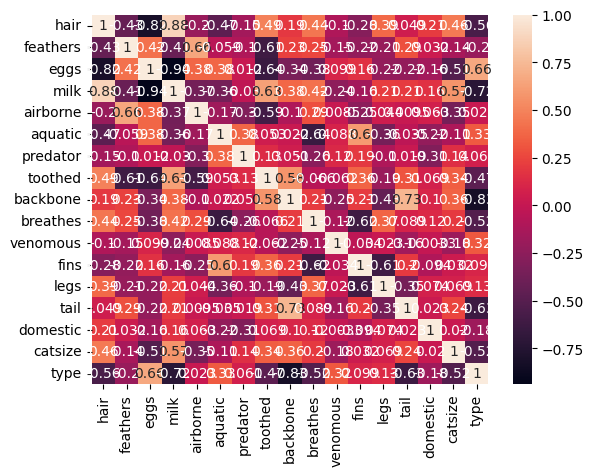

In [8]:
import seaborn as sns

sns.heatmap(Zoo.corr(),annot=True)

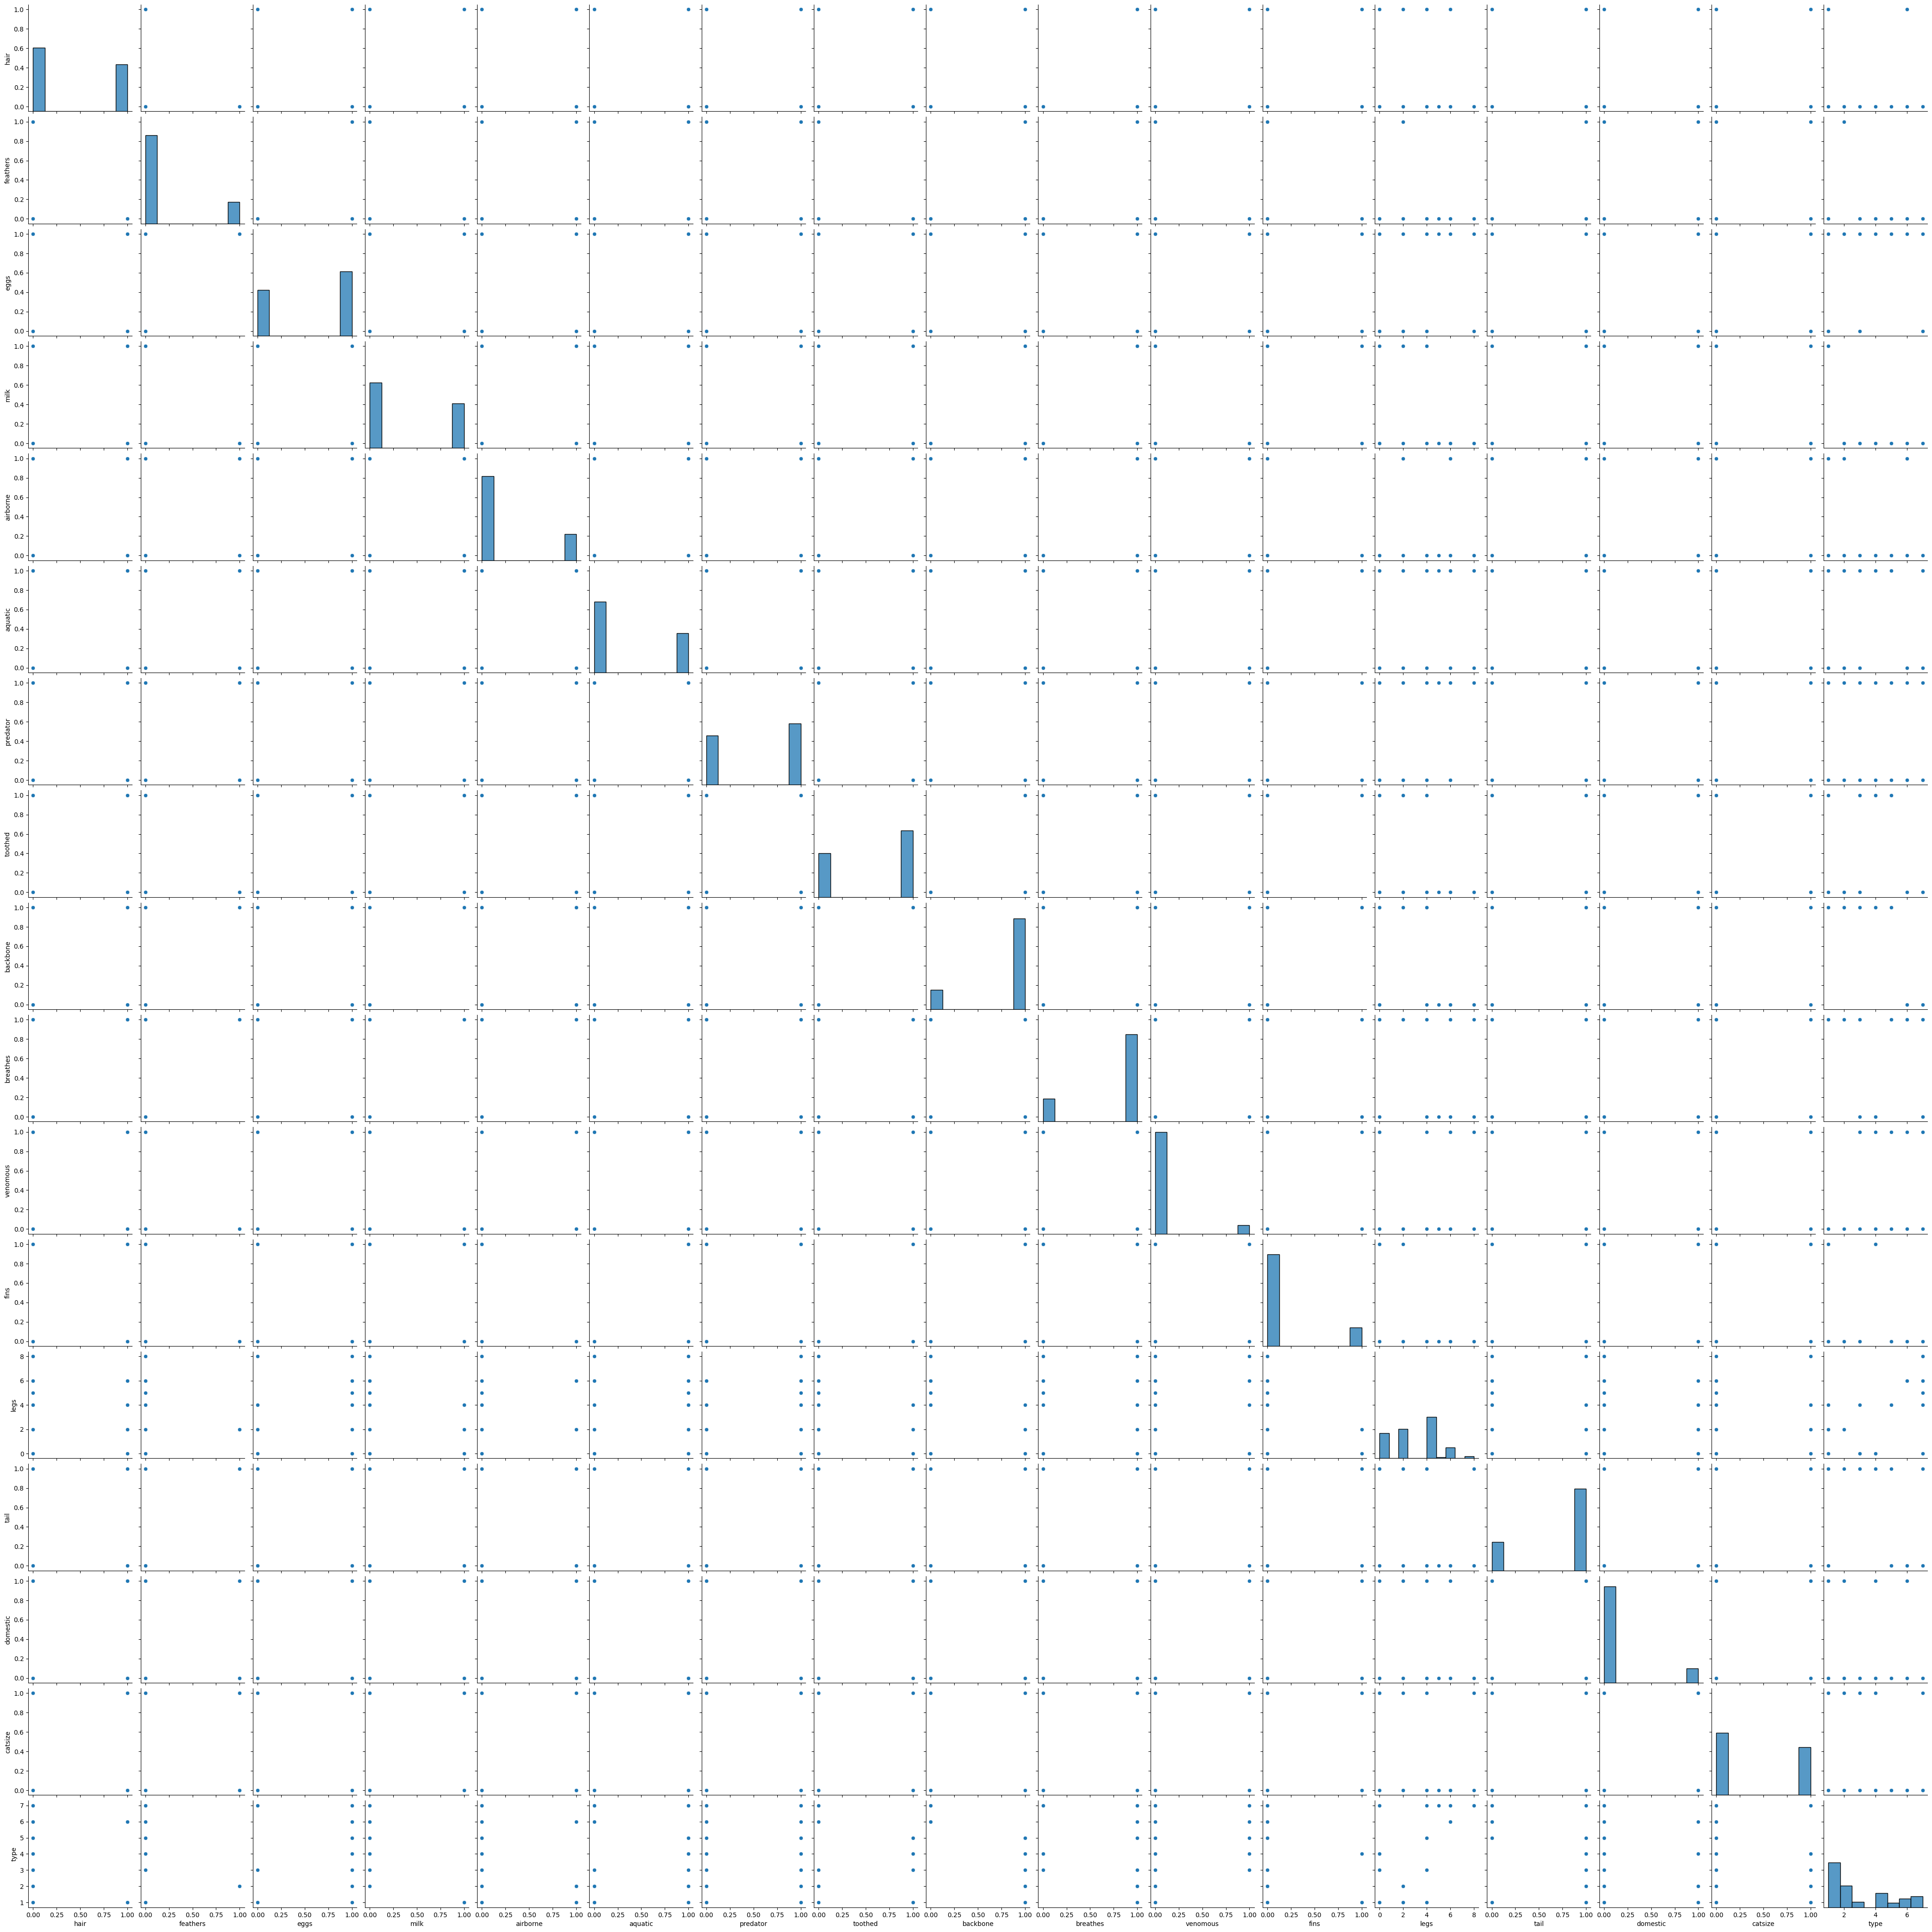

In [9]:
sns.pairplot(Zoo)

In [10]:
Zoo.shape


(101, 17)

In [11]:
Zoo.values

array([[1, 0, 0, ..., 0, 1, 1],
       [1, 0, 0, ..., 0, 1, 1],
       [0, 0, 1, ..., 0, 0, 4],
       ...,
       [1, 0, 0, ..., 0, 1, 1],
       [0, 0, 1, ..., 0, 0, 7],
       [0, 1, 1, ..., 0, 0, 2]])

In [12]:
array=Zoo.values
x=array[:,0:8]
y=array[:,8]


In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=200)


In [14]:
scale=StandardScaler()
x_train=scale.fit_transform(x_train)
x_test=scale.fit_transform(x_test)

In [15]:
x_train

array([[-0.8819171 , -0.51946248,  0.85972695, -0.83793058, -0.59660054,
         1.36277029,  0.97530483, -1.25723711],
       [ 1.13389342, -0.51946248, -1.16316   ,  1.19341628, -0.59660054,
        -0.73379939, -1.02532046,  0.79539491],
       [ 1.13389342, -0.51946248, -1.16316   ,  1.19341628, -0.59660054,
        -0.73379939,  0.97530483,  0.79539491],
       [ 1.13389342, -0.51946248, -1.16316   ,  1.19341628, -0.59660054,
        -0.73379939, -1.02532046,  0.79539491],
       [-0.8819171 , -0.51946248, -1.16316   ,  1.19341628, -0.59660054,
         1.36277029,  0.97530483,  0.79539491],
       [ 1.13389342, -0.51946248, -1.16316   ,  1.19341628, -0.59660054,
        -0.73379939, -1.02532046,  0.79539491],
       [-0.8819171 , -0.51946248,  0.85972695, -0.83793058, -0.59660054,
         1.36277029,  0.97530483, -1.25723711],
       [ 1.13389342, -0.51946248, -1.16316   ,  1.19341628, -0.59660054,
        -0.73379939, -1.02532046,  0.79539491],
       [-0.8819171 , -0.51946248

In [16]:
x_test

array([[-0.78446454, -0.40824829,  0.78446454, -0.78446454, -0.40824829,
         1.27475488, -1.58113883,  0.8660254 ],
       [-0.78446454, -0.40824829,  0.78446454, -0.78446454, -0.40824829,
         1.27475488,  0.63245553,  0.8660254 ],
       [-0.78446454, -0.40824829, -1.27475488, -0.78446454, -0.40824829,
        -0.78446454,  0.63245553, -1.15470054],
       [-0.78446454,  2.44948974,  0.78446454, -0.78446454,  2.44948974,
        -0.78446454,  0.63245553, -1.15470054],
       [-0.78446454, -0.40824829,  0.78446454, -0.78446454, -0.40824829,
         1.27475488,  0.63245553,  0.8660254 ],
       [ 1.27475488, -0.40824829, -1.27475488,  1.27475488, -0.40824829,
        -0.78446454,  0.63245553,  0.8660254 ],
       [-0.78446454, -0.40824829,  0.78446454, -0.78446454, -0.40824829,
        -0.78446454,  0.63245553,  0.8660254 ],
       [ 1.27475488, -0.40824829,  0.78446454,  1.27475488, -0.40824829,
         1.27475488,  0.63245553, -1.15470054],
       [ 1.27475488, -0.40824829

In [17]:
len(x_train),len(x_test)

(80, 21)

In [18]:
kfold=KFold(n_splits=8)


In [19]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=10)
Knn=cross_val_score(knn,x,y,cv=kfold)
Knn

array([1.        , 0.84615385, 0.92307692, 0.69230769, 0.84615385,
       1.        , 1.        , 0.91666667])

In [20]:
Knn.mean()

0.9030448717948718

** Glass**

In [21]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [22]:
from google.colab import files
uploaded =files.upload()


Saving glass.csv to glass.csv


In [23]:
glass=pd.read_csv('glass.csv')
glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [24]:
glass.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [25]:
glass.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [26]:
glass.corr()


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278
Type,-0.164237,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000


<Axes: >

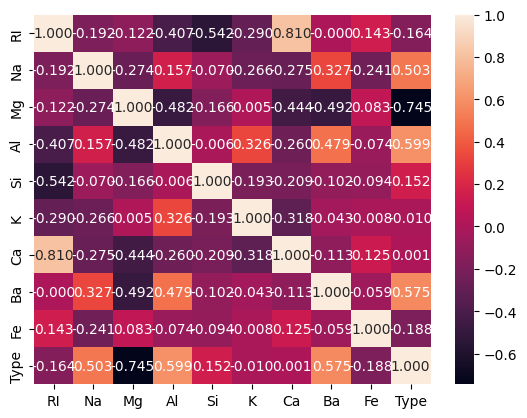

In [27]:
import seaborn as sns
sns.heatmap(glass.corr(),annot=True,fmt='.3f')


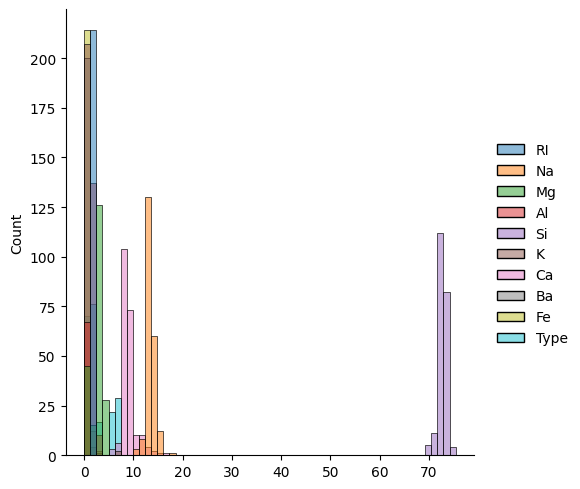

In [28]:
sns.displot(glass)

In [29]:
x=glass.iloc[:,:-1]
y=glass.iloc[:,-1]
y



0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Type, Length: 214, dtype: int64

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=50)



In [31]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)


In [32]:
x_train

array([[ 1.47869653, -0.26856539,  0.76092936, ...,  0.89565825,
        -0.36541712, -0.58652156],
       [ 0.35166708, -0.84217579, -0.57676783, ...,  0.9511415 ,
        -0.36541712, -0.58652156],
       [ 0.08088728, -0.49561951,  0.65642177, ...,  0.1902283 ,
        -0.36541712,  1.01053555],
       ...,
       [-0.00327401,  0.34089565, -1.86569482, ...,  1.66449763,
        -0.36541712, -0.58652156],
       [-0.53019687, -0.67487276,  0.61461873, ..., -0.71335613,
        -0.36541712, -0.58652156],
       [ 0.31507522,  0.67550171, -0.2005405 , ...,  0.53898019,
        -0.36541712, -0.58652156]])

In [33]:
x_test

array([[-0.17275268, -0.63505056,  0.65968719, -0.39959892, -0.02217211,
         0.32521616, -0.28576828, -0.30460914,  2.61842574],
       [ 1.0032351 ,  0.01277306,  0.59776652, -1.53968682, -0.67272778,
        -0.85788831,  0.49801484, -0.30460914, -0.31796694],
       [-0.64978026,  0.36485112,  0.59088644,  0.22473494, -0.15676983,
         0.37254034, -0.66450912, -0.30460914, -0.59325375],
       [-0.37172675,  0.82959416,  0.61152667, -0.07385952,  0.15729153,
        -0.00605309, -0.73289288, -0.30460914, -0.59325375],
       [-0.39723625, -0.69138305,  0.59088644, -0.10100447,  0.48256936,
         0.32521616, -0.33311088, -0.30460914, -0.59325375],
       [ 0.77620058,  1.25208783,  0.73536802, -1.29538227, -1.37936583,
        -0.59760533, -0.04379497, -0.30460914,  2.80195028],
       [-0.19826218, -0.08580879,  0.81792892,  0.06186524, -0.29136756,
         0.15958153, -0.48039899, -0.30460914,  0.32436896],
       [-0.19060933,  0.04093931,  0.43264472,  0.41474959, -0

In [34]:
len(x_train),len(x_test)

(171, 43)

In [35]:
kfold=KFold(n_splits=8)


In [36]:
model=KNeighborsClassifier(n_neighbors=1)
Score=cross_val_score(model,x,y,cv=kfold)
Score

array([0.51851852, 0.55555556, 0.81481481, 0.40740741, 0.40740741,
       0.22222222, 0.        , 0.03846154])

In [37]:
Score.mean()


0.370548433048433

In [38]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=1,metric='minkowski',p=2)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

** In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.**

In [39]:
from sklearn.metrics import accuracy_score
y_pred=knn.predict(x_test)
KNN_Scores=accuracy_score(y_pred,y_test)
KNN_Scores


0.7209302325581395

**GridSearch**

In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [41]:
import numpy as np
n_neighbors=np.array(range(1,81))
param_grid=dict(n_neighbors=n_neighbors)
param_grid

{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
        52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
        69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80])}

In [43]:
KNN=KNeighborsClassifier()
grid= GridSearchCV(estimator=KNN,param_grid=param_grid)
grid.fit(x,y)


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80])})

**In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.**

In [44]:
grid.best_score_

0.640531561461794

In [45]:
grid.best_params_

{'n_neighbors': 1}